<center><h1> CPE 4040 Spring 2024 Final Project</h1></center>

#### Please follow the instructions in the assignment document to complete this project.  
 
### General guidelines:
 * Please make sure to execute the codes and dispaly the results.
 * __Make comments and offer insight on your codes. Coding with no or poor comments will result in point deduction.__
 * __Academic Integrity__: you are encouraged to do reseach, however, do your own work. Do not copy-and-paste other people's work.    

### Submission:
 * __This Notebook serves as a report and, therefore, you are required to use the Markdown feature in Jupyter to format the analysis to include headings, subheadings, and any other necessary formatting to make the report clear and concise.__
 * Submit this notebook file and the pdf version.
 * __Check your PDF__: Before submitting, review the PDF file to ensure it is exported correctly. A corrupted and unreadable PDF file will result in point deduction. 
 * Deadline: 11:59 pm, 4/30 (Tuesday)

### The filename, "telco_churn.csv", is the dataset for this analysis.

The dataset contains the following groups of features/columns:

#### Demographic Information
  * **customerID**: A unique identifier for each customer
  * **gender**: The gender of the customer
  * **SeniorCitizen**: Whether the customer is a senior citizen or not (1 = yes, 0 = no)
  * **Partner**: Whether the customer has a partner or not (Yes/No)
  * **Dependents**: Whether the customer has dependents or not (Yes/No)
  
#### Customer Account Information
  * **tenure**: The number of months the customer has been with the company
  * **Contract**: The contract term of the customer (Month-to-month/One year/Two year)
  * **PaperlessBilling**: Whether the customer has paperless billing or not (Yes/No)
  * **PaymentMethod**: The payment method of the customer (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
  * **MonthlyCharges**: The amount charged to the customer monthly
  * **TotalCharges**: The total amount charged to the customer
  
#### Service Subscription
  * **PhoneService**: Whether the customer has a phone service or not (Yes/No)
  * **MultipleLines**: Whether the customer has multiple phone lines or not (Yes/No/No phone service)
  * **InternetService**: The type of internet service the customer has (DSL/Fiber optic/No)
  * **OnlineSecurity**: Whether the customer has online security or not (Yes/No/No internet service)
  * **OnlineBackup**: Whether the customer has online backup or not (Yes/No/No internet service)
  * **DeviceProtection**: Whether the customer has device protection or not (Yes/No/No internet service)
  * **TechSupport**: Whether the customer has tech support or not (Yes/No/No internet service)
  * **StreamingTV**: Whether the customer has streaming TV or not (Yes/No/No internet service)
  * **StreamingMovies**: Whether the customer has streaming movies or not (Yes/No/No internet service)
  
#### Finally, the target variable is `Churn`, which indicates whether the customer has churned or not (Yes/No).

### Import the libraries you need for the analysis

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set the style of seaborn plots
sns.set(style="whitegrid")


### Load the dataset

In [88]:
# Load the dataset
telco = pd.read_csv("telco_churn.csv")

# Display 5 rows (default)
telco.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Section 1: Data Cleaning and Preprocessing: (15 Points)
 1. Examine the basic attributes and statistics of the dataset.
 2. Identify and handle missing values and outliers.

#### The column 'TotalCharges' should not be an object data type. Convert it into a numeric data type.

Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


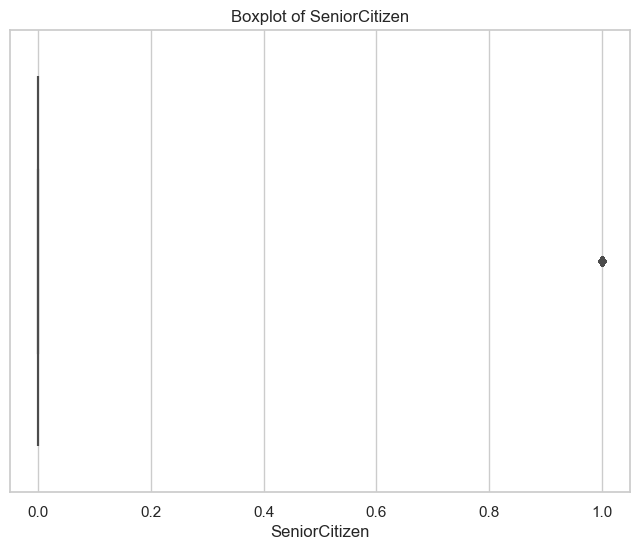

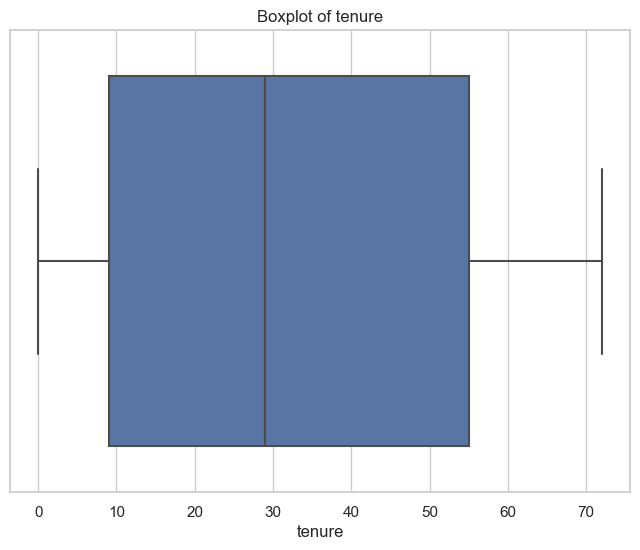

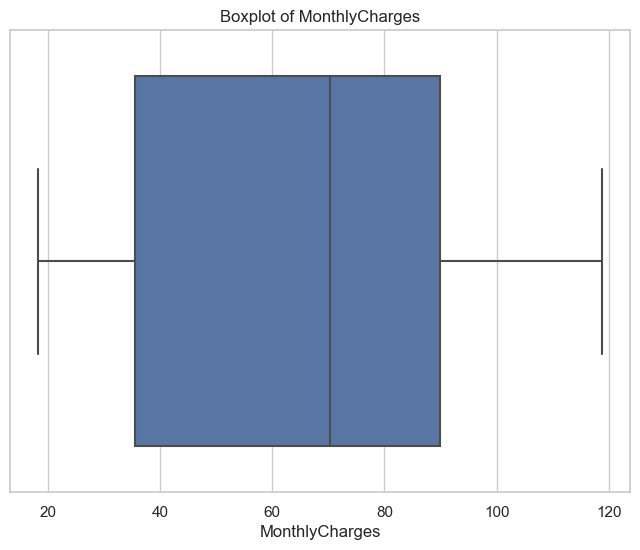

In [89]:
# Check for missing values
missing_values = telco.isnull().sum()
print("Missing values:\n", missing_values)

# drop missing values
telco.dropna(inplace=True)

# Check for outliers in numerical columns
numerical_columns = telco.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=telco[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

# Convert the 'TotalCharges' column to a numeric data type
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')


<h4>Remove the "customerID" column</h4>

In [90]:
# Remove 'customerID' column
telco.drop(columns=['customerID'], inplace=True)

In [91]:
# Display 5 rows (default)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Section 2: Exploratory Data Analysis (EDA): (35 Points)

__In this section, you will focus on uncovering the factors that influence customer churn rates.__

  * Step 1: Formulating Research Questions: propose at least __four__ specific questions related to customer churn. Examples of such questions could include:
       - Is there a correlation between tenure length and churn rate?
       - How does the type of service (e.g., Internet, phone service) influence the likelihood of churn?
  
  * Step 2: For each question, conduct the analysis by creating visualizations and performing statistical analyses. 
  
__Note: Make sure your visualizations are clearly labeled with titles, axes labels, and legends where applicable.__ 

C:\Users\mc2di\anaconda3\envs\CPE-4903-310103\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


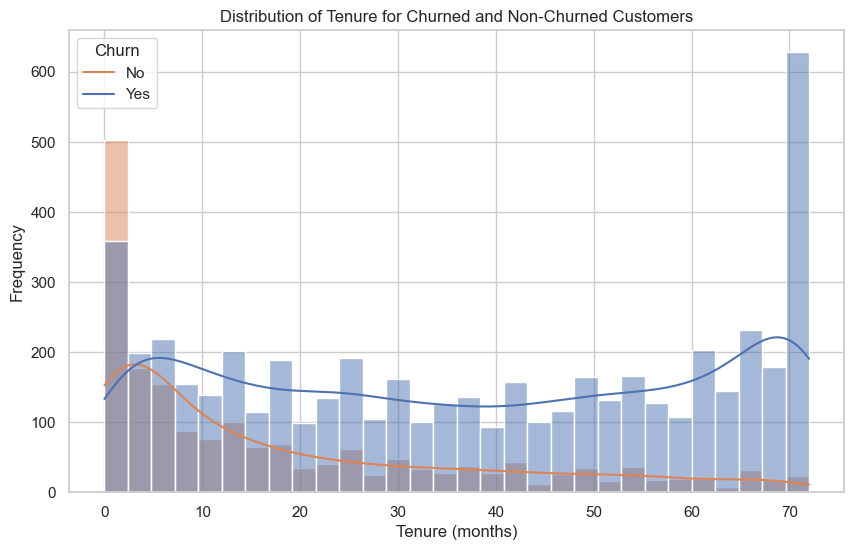

In [92]:
# 1. Is there a correlation between tenure length and churn rate?

# Plotting the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=telco, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Tenure for Churned and Non-Churned Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


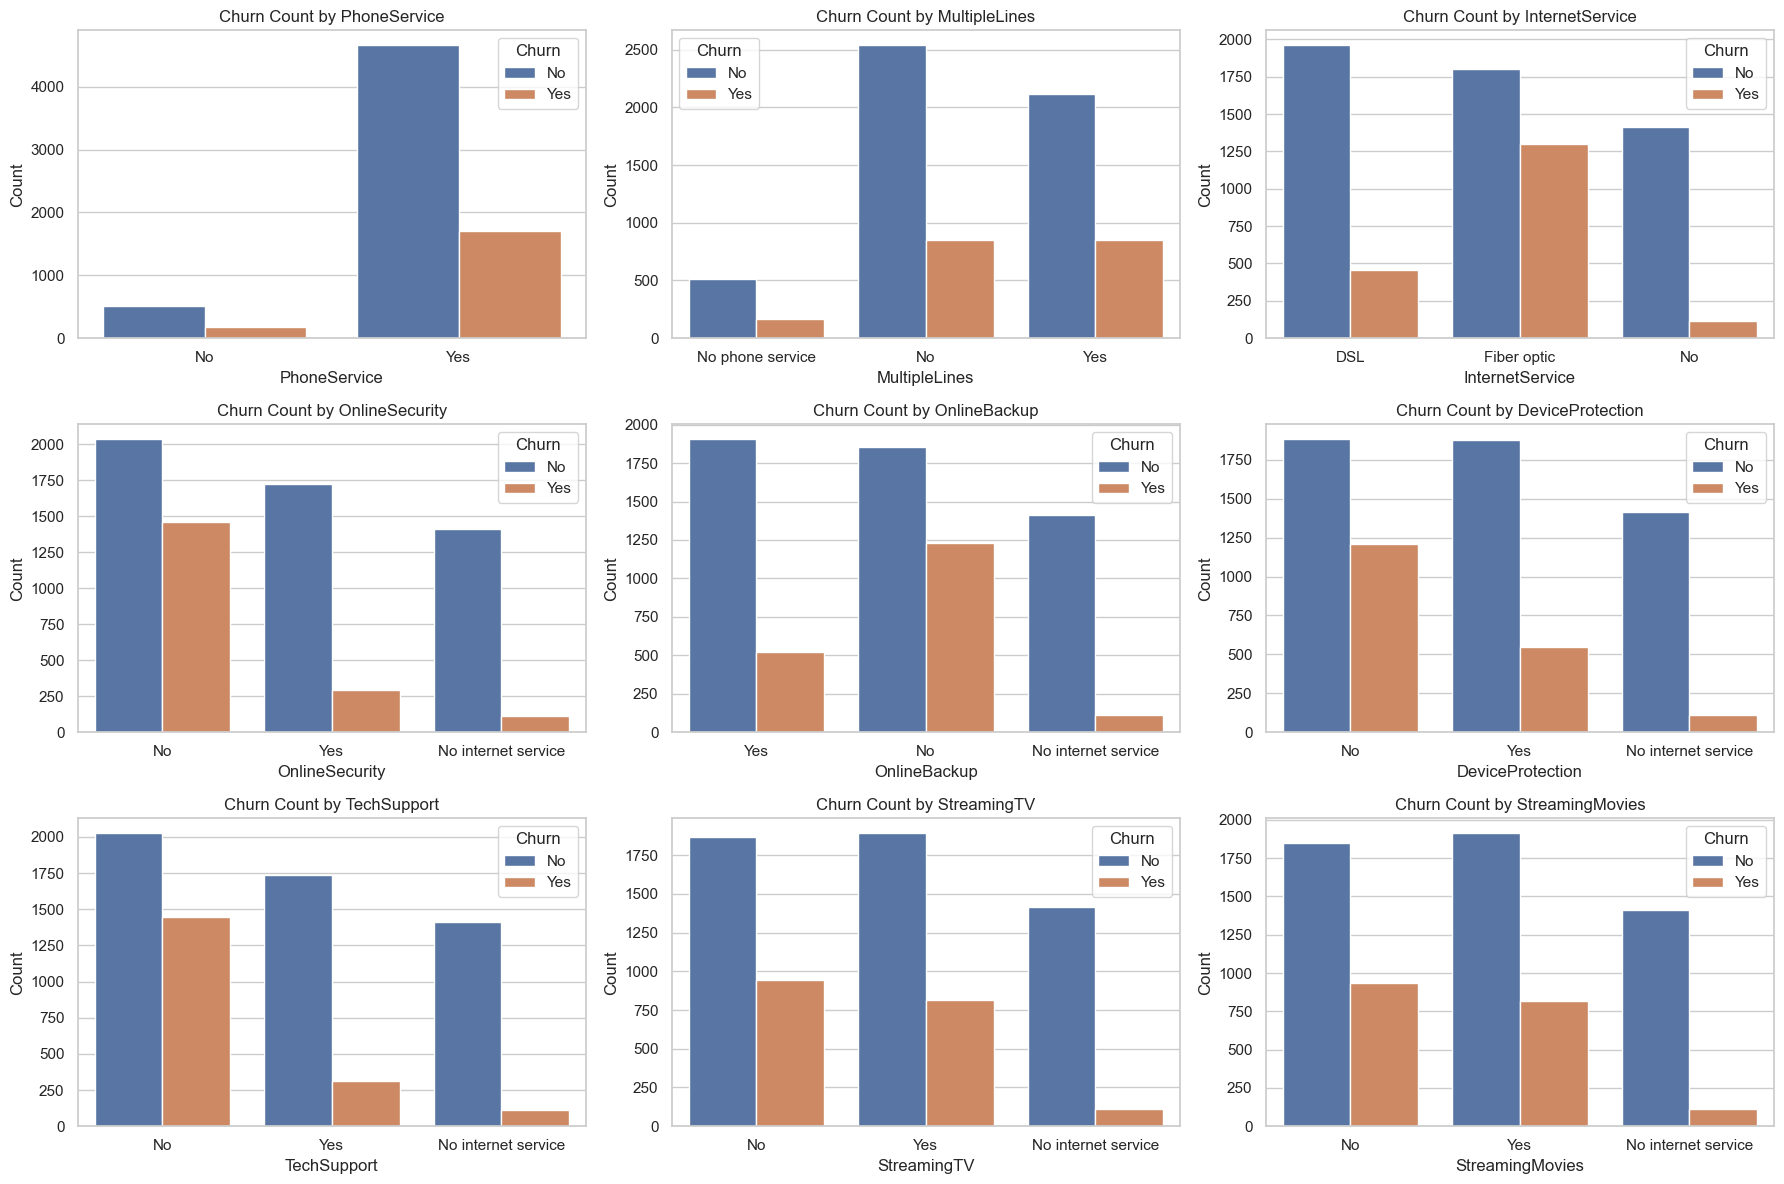

In [93]:
# 2. How does the type of service (e.g., Internet, phone service) influence the likelihood of churn?

# Plotting the count of churned and non-churned customers for each type of service
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

plt.figure(figsize=(18, 12))
for i, column in enumerate(service_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=telco, x=column, hue='Churn')
    plt.title(f'Churn Count by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Churn', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


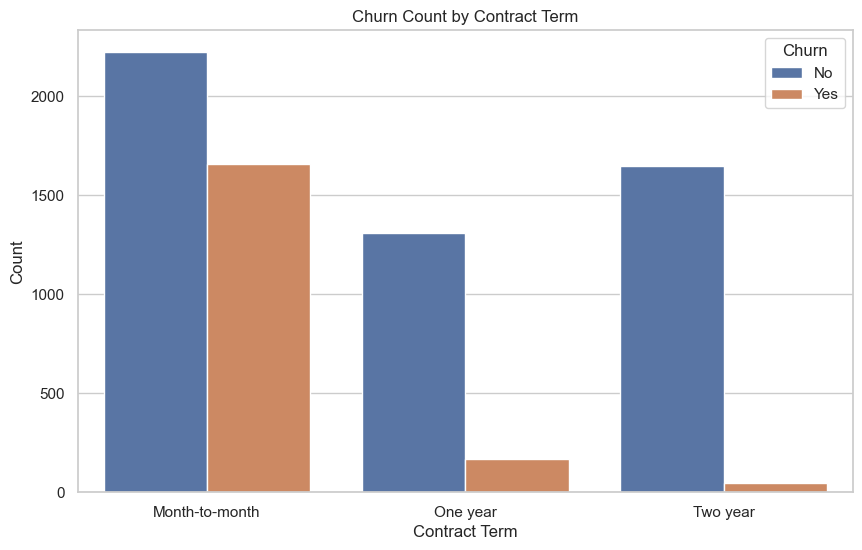

In [94]:
 # 3. How does the contract term influence the likelihood of churn?

# Plotting the count of churned and non-churned customers for each contract term
plt.figure(figsize=(10, 6))
sns.countplot(data=telco, x='Contract', hue='Churn')
plt.title('Churn Count by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


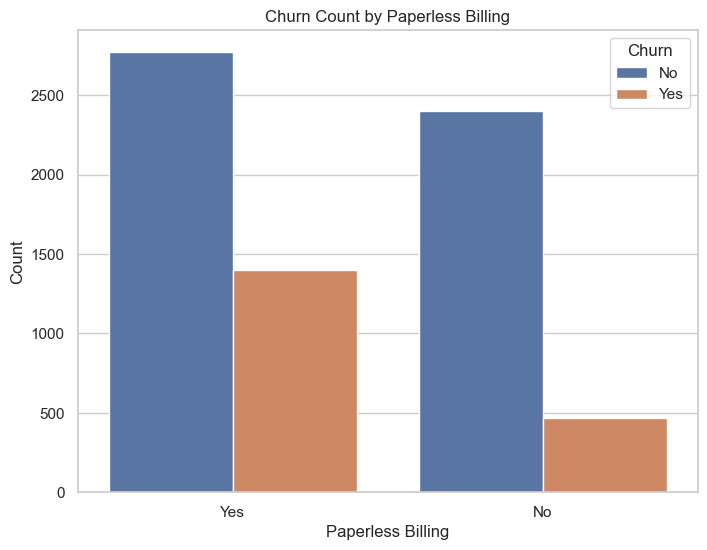

In [95]:
# 4. Does paperless billing affect the likelihood of churn?

# Plotting the count of churned and non-churned customers for paperless billing
plt.figure(figsize=(8, 6))
sns.countplot(data=telco, x='PaperlessBilling', hue='Churn')
plt.title('Churn Count by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()


### Question: Based on the analysis, can you identify some of the more relevant attributes for detecting churn?

In [96]:
# Looking at 1. Is there a correlation between tenure length and churn rate?
# We can see that the rate of when churn does occur gradually dwindles as it reaches a high number of tenured months. We can assume that there is 
# little to no moving after the tenure value reaches past 30 months (because it starts to converge). The higher the frequency is not too much of a difference
# from either end of the graph.

# Looking at 2. How does the type of service (e.g., Internet, phone service) influence the likelihood of churn?
# This one is a bit hard to see but the streaming one looks particularly even across the board (for both tv and movies as a whole). 

# Looking at 3. How does the contract term influence the likelihood of churn?
# I'm assuming the month-to-month allows the customers to feel less loyal and pressured to stick to one single service hence the high churn rate. The 
# one and two year contracts have a lot more retention (particularly because the customer is tied down to the company. 

# Looking at 4. 
# The billing method doesn't seem to have much of an impact on churn rate. There is a lot of people who churn regardless of using paper bills or ebills.

## Section 3: Predictive Modeling (35 Points)

 1. Perform feature engineering and selection to identify the relevant features for predicting customer churn.
 2. Perform __logistic regression__ modeling to classify if a customer is likely to churn.
 3. Evaluate the model performance using metrics such as accuracy, precision, recall, F1-score, etc.
 4. Interpret the coefficients and identify the most important features in the model.

### Section 3.1 Feature Engineering and Selection

### Section 3.1.1 Converting Categorical Features¶
There are many categorial features in this dataset that need to be converted to __"dummy"__ numerical variables.

#### First, convert the target column "Churn" by replacing "Yes" to "1" and "No" to "0".

In [97]:
# Convert the target column "Churn" to binary numeric values
telco['Churn'] = telco['Churn'].map({'Yes': 1, 'No': 0})

# Display the unique values in the "Churn" column to verify the conversion
telco['Churn'].unique()


array([0, 1], dtype=int64)

<h4>Second, use pd.get_dummies( ) to convert the categorical columns.</h4>
<h4>Remember to use "drop_first = True" option to remove the redundant column.</h4>

In [98]:
# Get dummy variables for categorical columns
telco = pd.get_dummies(telco, drop_first=True)

# Display the first few rows of the dataframe to verify the conversion
telco.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


### Section 3.1.2 Normalizing Data in X (Features)

**Since we want to classify whether a customer is likely to cancel the service, the output (target) will be the "Churn" column. The rest of the columns will be the input (features). So you will drop the Churn column from the dataset and make it `X` and pick the Churn column and make it `y`.**

In [99]:
# Separate features (X) and target variable (y)
X = telco.drop(columns=['Churn'])
y = telco['Churn']

# Display the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (7043, 30)
Shape of y: (7043,)


#### This step will help the performace, as well as yield a better interpretation of the regression model. 
#### Follow the instruction below:
   * Calcuate the mean and standard deviation for each column of **X** 
   * Normalize each column of **X** by the equation: **X = $\frac{(X - \text{mean})}{\text{stdev}}$**

In [100]:
# Calculate the mean and standard deviation for each column of X
X_mean = X.mean()
X_std = X.std()

# Normalize each column of X
X_normalized = (X - X_mean) / X_std

# Display the first few rows of the normalized features matrix
X_normalized.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439885,-1.277354,-1.160241,-0.994123,-1.009487,1.034457,-0.653965,-3.053794,3.053794,-0.854116,...,-0.52589,-0.790076,-0.52589,-0.796014,-0.514213,-0.562935,0.829739,-0.52501,1.406319,-0.544768
1,-0.439885,0.066323,-0.259611,-0.173727,0.990462,-0.966554,-0.653965,0.327415,-0.327415,-0.854116,...,-0.52589,-0.790076,-0.52589,-0.796014,1.944444,-0.562935,-1.205028,-0.52501,-0.710975,1.835382
2,-0.439885,-1.236636,-0.362635,-0.959581,0.990462,-0.966554,-0.653965,0.327415,-0.327415,-0.854116,...,-0.52589,-0.790076,-0.52589,-0.796014,-0.514213,-0.562935,0.829739,-0.52501,-0.710975,1.835382
3,-0.439885,0.514215,-0.746482,-0.195234,0.990462,-0.966554,-0.653965,-3.053794,3.053794,-0.854116,...,-0.52589,-0.790076,-0.52589,-0.796014,1.944444,-0.562935,-1.205028,-0.52501,-0.710975,-0.544768
4,-0.439885,-1.236636,0.197351,-0.940391,-1.009487,-0.966554,-0.653965,0.327415,-0.327415,-0.854116,...,-0.52589,-0.790076,-0.52589,-0.796014,-0.514213,-0.562935,0.829739,-0.52501,1.406319,-0.544768


### Section 3.2 Logistic Regression Modeling

### Section 3.2.1 Train-Test Split
#### Split the dataset into training set and testing set using proper Sklearn package.
#### Use a test size of 30% and your own arbitrary number for random_state.

In [101]:
# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4930, 30)
Shape of X_test: (2113, 30)
Shape of y_train: (4930,)
Shape of y_test: (2113,)


### Section 3.2.2 Train and Fit Your Model

**Use Sklearn package on the training data and obtain the prediction model.**

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Initialize the logistic regression model
model = LogisticRegression()

# Impute missing values in the training data
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)

# Fit the model on the imputed training data
model.fit(X_train_imputed, y_train)

# Impute missing values in the test data
X_test_imputed = imputer.transform(X_test)

# Predict on the test data
predictions = model.predict(X_test_imputed)


### Section 3.3 Prediction and Model Evaluation
### Section 3.3.1 Use Sklearn package to predict the outcomes on the test data. 
#### Question: How many positive predictions (i.e., churn) from the testing data?

In [103]:
# Use the trained model to predict outcomes on the test data
predictions = model.predict(X_test_clean)


# Calculate the number of positive predictions (churn)
num_positive_predictions = sum(predictions)

# Print the result
print("Number of positive predictions (churn):", num_positive_predictions)


Number of positive predictions (churn): 483


C:\Users\mc2di\anaconda3\envs\CPE-4903-310103\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<h3>Section 3.3.2 Use Sklearn package to create the Confusion Matrix</h3>
<h4>What are the values of TP (True Positive), TN (True Negative), FP (False Positive) and FN (False Negative)? As a reminder, "positive" means "Churn" and vice versa. </h4>
<h4>Please print out the results.</h4>

In [104]:
from sklearn.metrics import confusion_matrix

# Remove rows with NaN values from X_test and y_test and synchronize indices
X_test_clean = X_test.dropna()
y_test_clean = y_test.dropna()
y_test_clean = y_test_clean.loc[X_test_clean.index]

# Predict on the cleaned test data
predictions = model.predict(X_test_clean)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_clean, predictions)

# Extract TP, TN, FP, FN values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print the results
print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)


True Positive (TP): 330
True Negative (TN): 1383
False Positive (FP): 153
False Negative (FN): 244


C:\Users\mc2di\anaconda3\envs\CPE-4903-310103\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<h3>Section 3.3.3 Use Sklearn package to create the Classification Report.</h3>
<h4>What are the values of Accuracy, Precision (positive and negative), Recall, Specificity, and F-1 Score? </h4>
<h4>Please print out the results.</h4>

In [105]:
from sklearn.metrics import classification_report

# Calculate the classification report
class_report = classification_report(y_test_clean, predictions)

print(class_report)


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1536
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2110
   macro avg       0.77      0.74      0.75      2110
weighted avg       0.80      0.81      0.81      2110



#### Based on the values of precision and recall, please comment whether the model predicts more accurately with customers who churn or do not churn.

In [106]:
# Based on the precision and recall values:
    # Precision (positive, churn): 0.68
    # Precision (negative, not churn): 0.85
    # Recall (positive, churn): 0.57
    # Recall (negative, not churn): 0.90

# Precision for not churn (negative) is higher (0.85) than precision for churn (positive) (0.68). 
# This means that when the model predicts a customer not to churn, it's more likely to be correct.

# For not churn (negative) is also higher (0.90) than recall for churn (positive) (0.57).
# This indicates that the model is better at identifying customers who do not churn.

## Section 3.4 Interpreting the Prediction Model

**To get a better sense of the logistic regression model, we will retrieve the regression coefficients and visualize which features have greater impact on the prediction outcome.**

### Section 3.4.1 Follow the instruction:
 1. Use **"weights = pd.Series(model.coef_[0], index=X.columns.values)"** to obtain the regression coefficients, where __model__ is the name of your model.
 2. Make a **vertical bar chart** with the feature lables in the x-axis and the coefficients in the y-axis. **Order the coefficents in descending order**.

In [107]:
# Retrieve regression coefficients
weights = pd.Series(model.coef_[0], index=X.columns.values)

# Sort coefficients in descending order
weights_sorted = weights.sort_values(ascending=False)


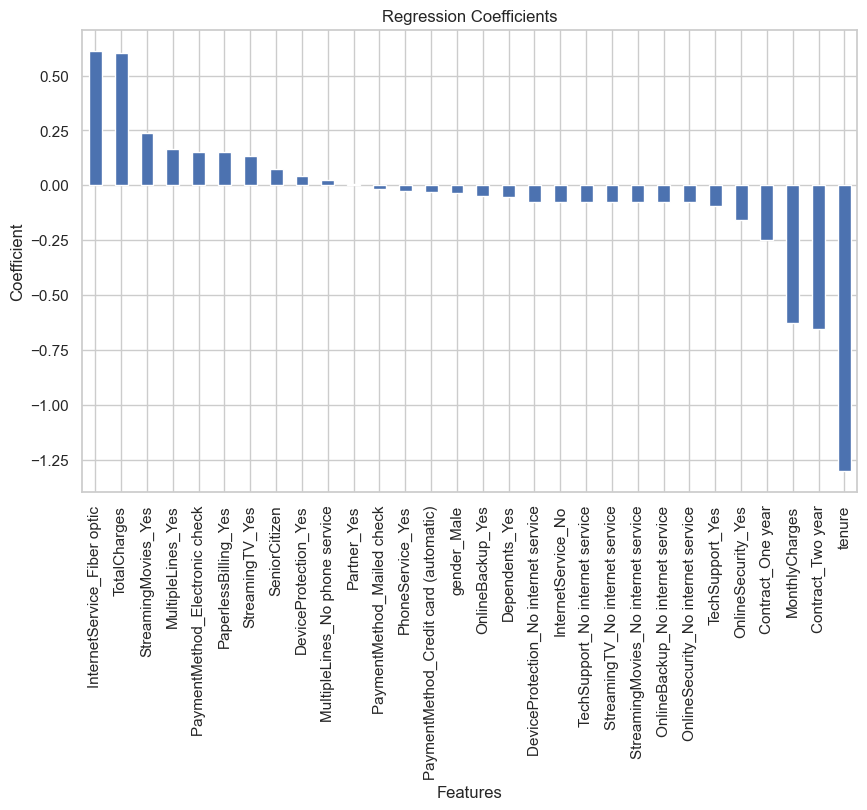

In [108]:
# Create vertical bar chart
plt.figure(figsize=(10, 6))
weights_sorted.plot(kind='bar')
plt.title('Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.show()

### Section 3.4.2 Based on the coefficients and the chart, what is your observation? 

**Q1: What are some of the factors that have the most positive relation with customer churn? What are the factors that have the most negative relation with the customer churn?**

In [109]:
# Factors with the most positive relation with customer churn:

# Total Charges
# InternetService_FiberOptic
# StreamingMovies_Yes

#Factors with the most negative relation with customer churn:

# Tenure
# Contract_Two year
# MonthlyCharges
# Contract_One year

**Q2: Do those observations align with your earlier analysis in Section 2?**

In [110]:
# Yes, the observations align with the earlier analysis in Section 2, where we explored the relationship between various features and customer churn.
# We found that factors such as higher total charges, fiber optic internet service, and streaming movies were positively associated with churn,
# while factors such as longer tenure, longer contract terms (two-year and one-year contracts), and lower monthly charges were negatively 
# associated with churn.
# These findings are consistent with the regression coefficients and chart generated in Section 3.4.2,
# confirming the importance of these factors in predicting customer churn.


## Section 4: Conclusion and Recommedation (10 Points)

 * Summarize the main findings and insights from the project.
 * Based on the analytical insights, suggest customer retention programs that can help the company improve the churn rate.

In [111]:
# 1: Key predictors of churn ended up being factors such as total charges, type of internet service (especially fiber optic), and additional services 
# like streaming movies were positively associated with customer churn. On the other hand, there were negative factors like tenure, contract terms (1&2)
# and lower monthly chargers that were affecting customer churn.

# 2: The logistic model achieved an accuracy of 81% on the test data which is pretty good in prediction for this type of situtation.The model does
# a pretty good job at finding the customers that will not churn.

# 3: Customer retention can be gained from this project. There are several ways a company can strategize on retaining customers like promotional offers,
# catered services, long-term contracts.


In [112]:
# By implementing these customer retention programs, the company can effectively address the factors contributing to churn 
# and improve customer satisfaction, loyalty, and ultimately reduce churn rate, leading to better business outcomes and profitability.

## <span style="color:blue">Wonderful, you are done! It has been a fun semester. Have a nice summer!